# Problem
Online Retailer Customer Segmentation and Analysis

We are going to perform an exploratory data  analysis for an online retail store data set, in order to understand its customers.

 * How can I scale my current business that is doing really well, in the most effective way?
 
# Data


# Eval
* Monthly Revenue Overview
* Monthly Items Sold Overview
* Monthly Active Customers
* Average Revenue per Month
* New vs Existing Users



# Data Collection and Cleaning

In [27]:
%%time
# Import Standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://raw.githubusercontent.com/anilak1978/ecommerce/master/OnlineRetail.csv", encoding="ISO-8859-1",low_memory=False)
df.head()

CPU times: total: 1.36 s
Wall time: 24 s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.to_csv('dataonline.csv', index=False)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#import pandas_profiling as pp
#pp.ProfileReport(df)

In [7]:
df.shape

(541909, 8)

In [8]:
# Look for datatypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
# Look for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Add Revenue variable and update InvoiceDate 
df["Revenue"]=df["UnitPrice"]*df["Quantity"]
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df["InvoiceMonth"]=pd.DatetimeIndex(df["InvoiceDate"]).month
df["InvoiceYear"]=pd.DatetimeIndex(df["InvoiceDate"]).year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


In [11]:
df.shape

(541909, 11)

Data Exploration

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID,Revenue,InvoiceMonth,InvoiceYear
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,7.553128,2010.921609
std,218.081158,96.759853,1713.600303,378.810824,3.509055,0.268787
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,1.000000,2010.000000
25%,1.000000,1.250000,13953.000000,3.400000,5.000000,2011.000000
50%,3.000000,2.080000,15152.000000,9.750000,8.000000,2011.000000
75%,10.000000,4.130000,16791.000000,17.400000,11.000000,2011.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,12.000000,2011.000000


# Monthly Revenue Overview

In [13]:
%matplotlib inline
#Monthly Revenue Overview
df_revenue=df.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].sum().reset_index()
df_revenue.head()


,InvoiceMonth,InvoiceYear,Revenue
0,1,2011,560000.260
1,2,2011,498062.650
2,3,2011,683267.080
3,4,2011,493207.121
4,5,2011,723333.510


Text(0, 0.5, 'Revenue')

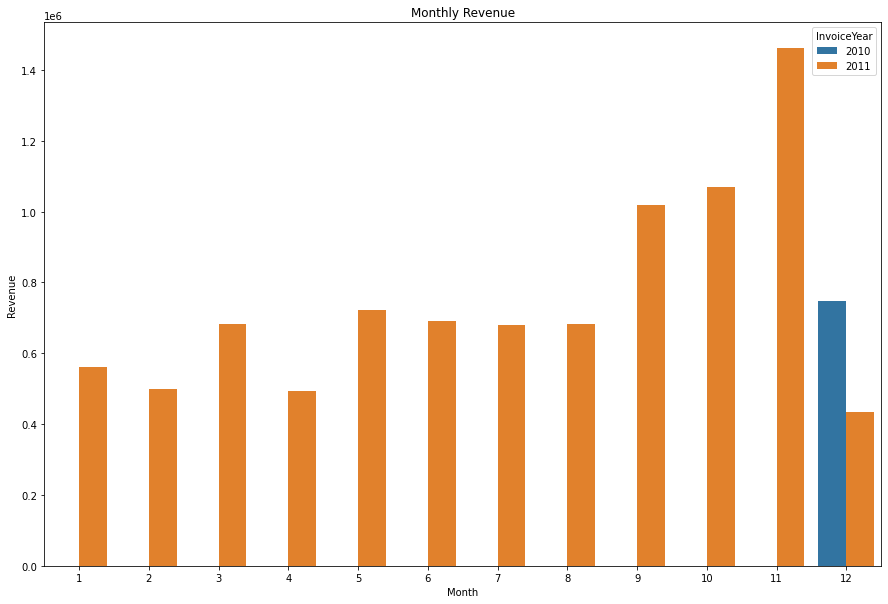

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", data=df_revenue)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

# Monthly Revenue Overview (lineplot)

Text(23.660254629629634, 0.5, 'Revenue')

<Figure size 432x288 with 0 Axes>

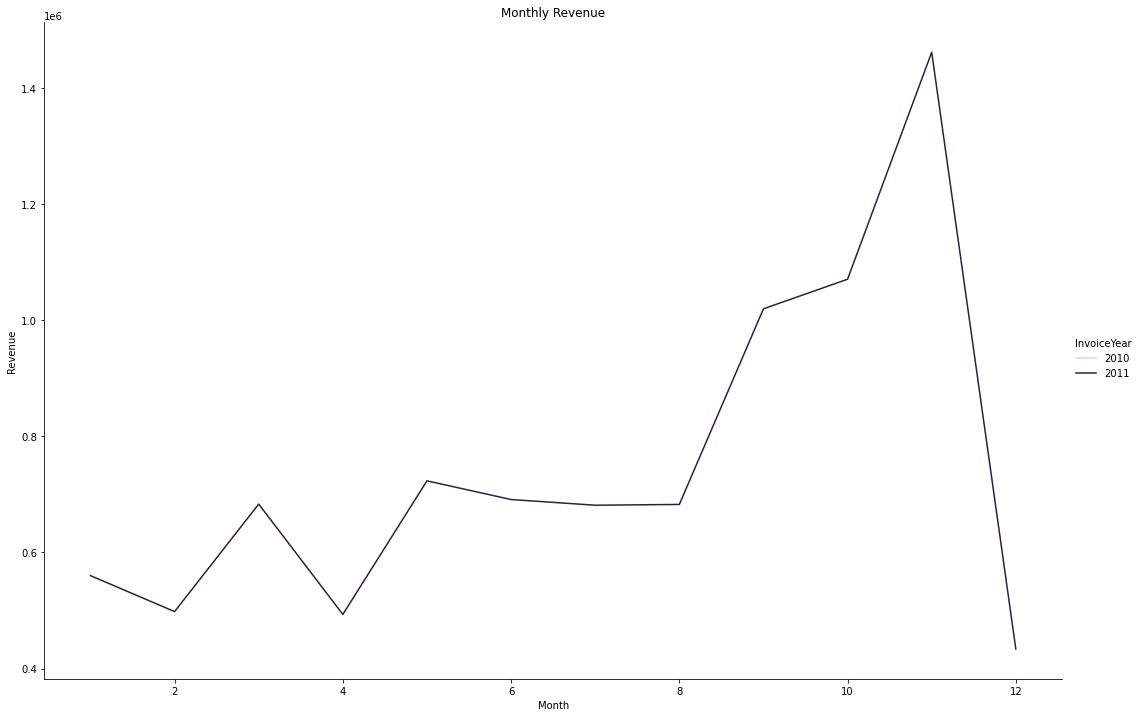

In [15]:

plt.figure()
sns.relplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", kind="line", data=df_revenue, height=10, aspect=15/10)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

we realize that our data set starts in December 2010 and goes all the way to December 2011. We notice that the revenue slumps around December 2011. We need to see if this is due to customers not purchasing our merchandise or if it is related to an issue within the dataset.

In [16]:
# Look at the December 2011 data
df_december_2011=df.query("InvoiceMonth==12 and InvoiceYear==2011")
df_december_2011

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,-8,2011-12-01 08:12:00,4.15,13853.0,United Kingdom,-33.20,12,2011
516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-1,2011-12-01 08:14:00,1.25,15197.0,United Kingdom,-1.25,12,2011
516386,C579890,23374,RED SPOT PAPER GIFT BAG,-1,2011-12-01 08:14:00,0.82,15197.0,United Kingdom,-0.82,12,2011
516387,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,2011-12-01 08:14:00,0.85,15197.0,United Kingdom,-1.70,12,2011
516388,C579891,23485,BOTANICAL GARDENS WALL CLOCK,-1,2011-12-01 08:18:00,25.00,13644.0,United Kingdom,-25.00,12,2011
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011


Based on the december 2011 data, we understand that the data set does not include any purchases after December 9th 2011. We need to make sure, we consider this within our analysis and conclusion.
On a separate note; we can see that the revenue grows steadily starting from September 2011 all the way up to December 2011, November being the best month in terms of revenue.

# Monthly Items Sold Overview

In [17]:
# Monthly Items Sold Overview
df_quantity=df.groupby(["InvoiceMonth", "InvoiceYear"])["Quantity"].sum().reset_index()
df_quantity.head()


,InvoiceMonth,InvoiceYear,Quantity
0,1,2011,308966
1,2,2011,277989
2,3,2011,351872
3,4,2011,289098
4,5,2011,380391


Text(0, 0.5, 'Items Sold')

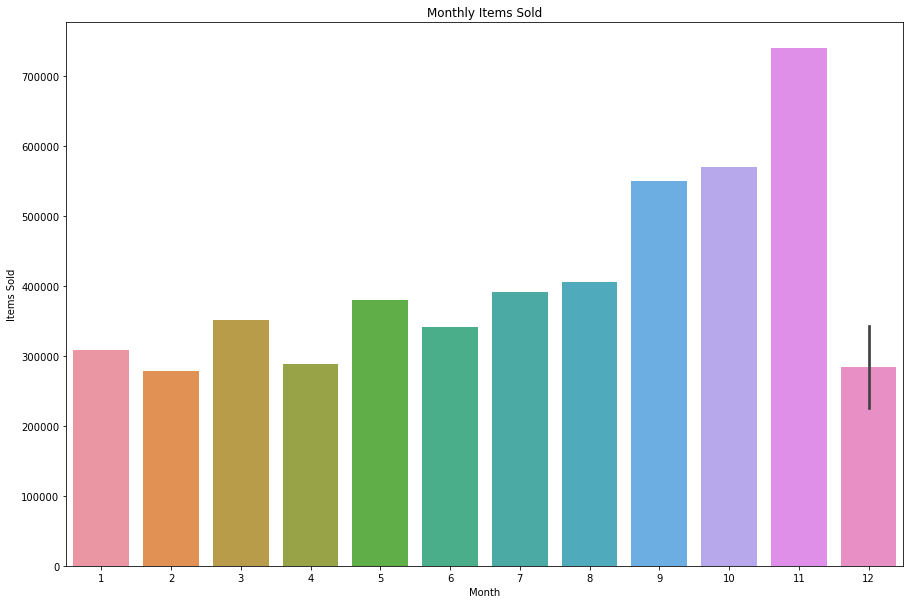

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Quantity", data=df_quantity)
plt.title("Monthly Items Sold")
plt.xlabel("Month")
plt.ylabel("Items Sold")

# Monthly Active Customers

In [19]:
# Monthly Active Customers
df_active=df.groupby(["InvoiceMonth", "InvoiceYear"])["CustomerID"].nunique().reset_index()
df_active.head()

,InvoiceMonth,InvoiceYear,CustomerID
0,1,2011,783
1,2,2011,798
2,3,2011,1020
3,4,2011,899
4,5,2011,1079


Text(0, 0.5, 'Active Users')

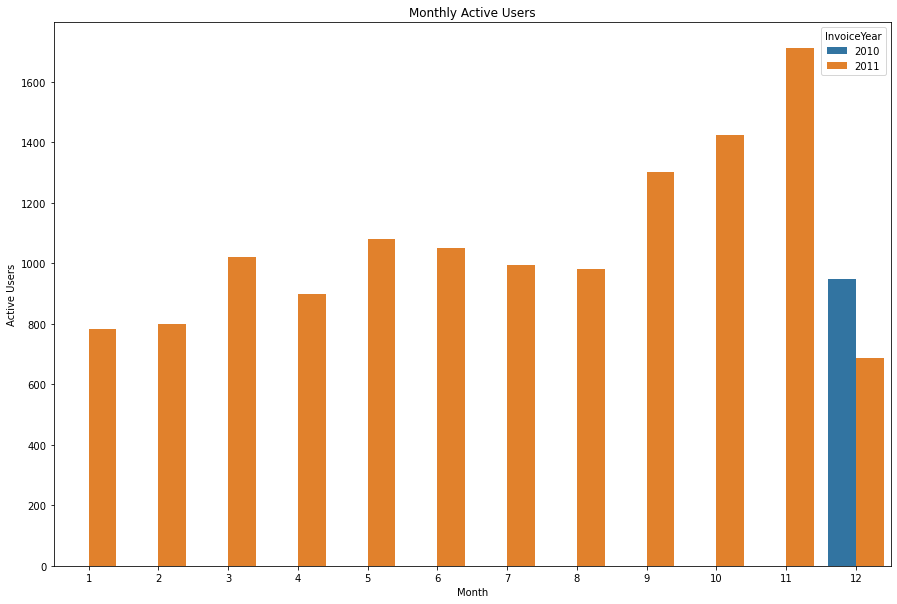

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="CustomerID", hue="InvoiceYear", data=df_active)
plt.title("Monthly Active Users")
plt.xlabel("Month")
plt.ylabel("Active Users")

# Average Revenue per Month

Text(0, 0.5, 'Revenue')

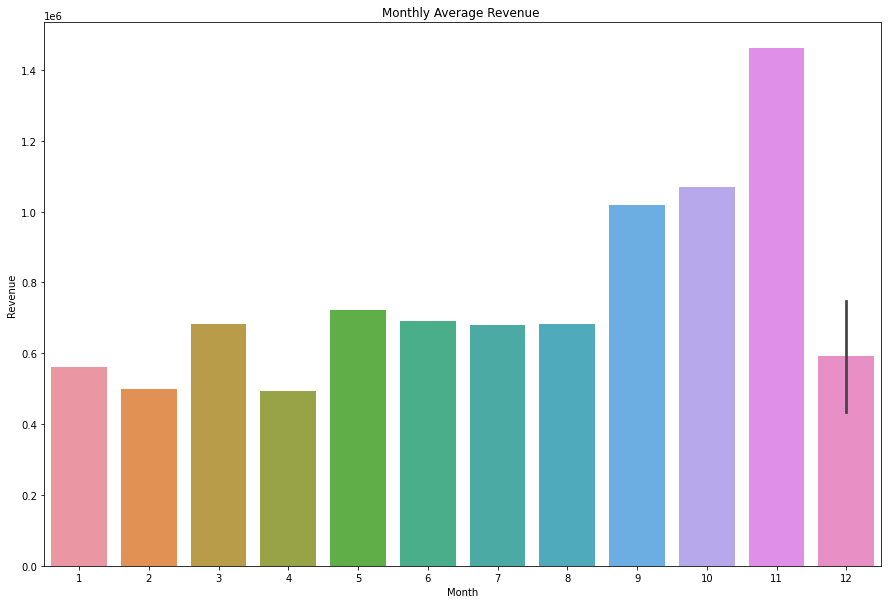

In [21]:
# Average Revenue per Month
df_revenue_avg=df.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Revenue", data=df_revenue)
plt.title("Monthly Average Revenue ")
plt.xlabel("Month")
plt.ylabel("Revenue")

# New vs Existing Users

In [22]:
# New vs Existing Users
df_first_purchase=df.groupby(["CustomerID"])["InvoiceDate"].min().reset_index()
df_first_purchase.head()


,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-12-16 19:09:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [23]:
df_first_purchase.columns=["CustomerID", "FirstPurchaseDate"]
df_first_purchase.head()


,CustomerID,FirstPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-12-16 19:09:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [25]:
df=pd.merge(df, df_first_purchase, on="CustomerID")
df["UserType"]="New"
df.loc[df["InvoiceDate"]>df["FirstPurchaseDate"], "UserType"]="Existing"

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear,FirstPurchaseDate,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,2010-12-01 08:26:00,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12-01 08:26:00,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,2010-12-01 08:26:00,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12-01 08:26:00,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12-01 08:26:00,New


Text(23.128221450617282, 0.5, 'Revenue')

<Figure size 432x288 with 0 Axes>

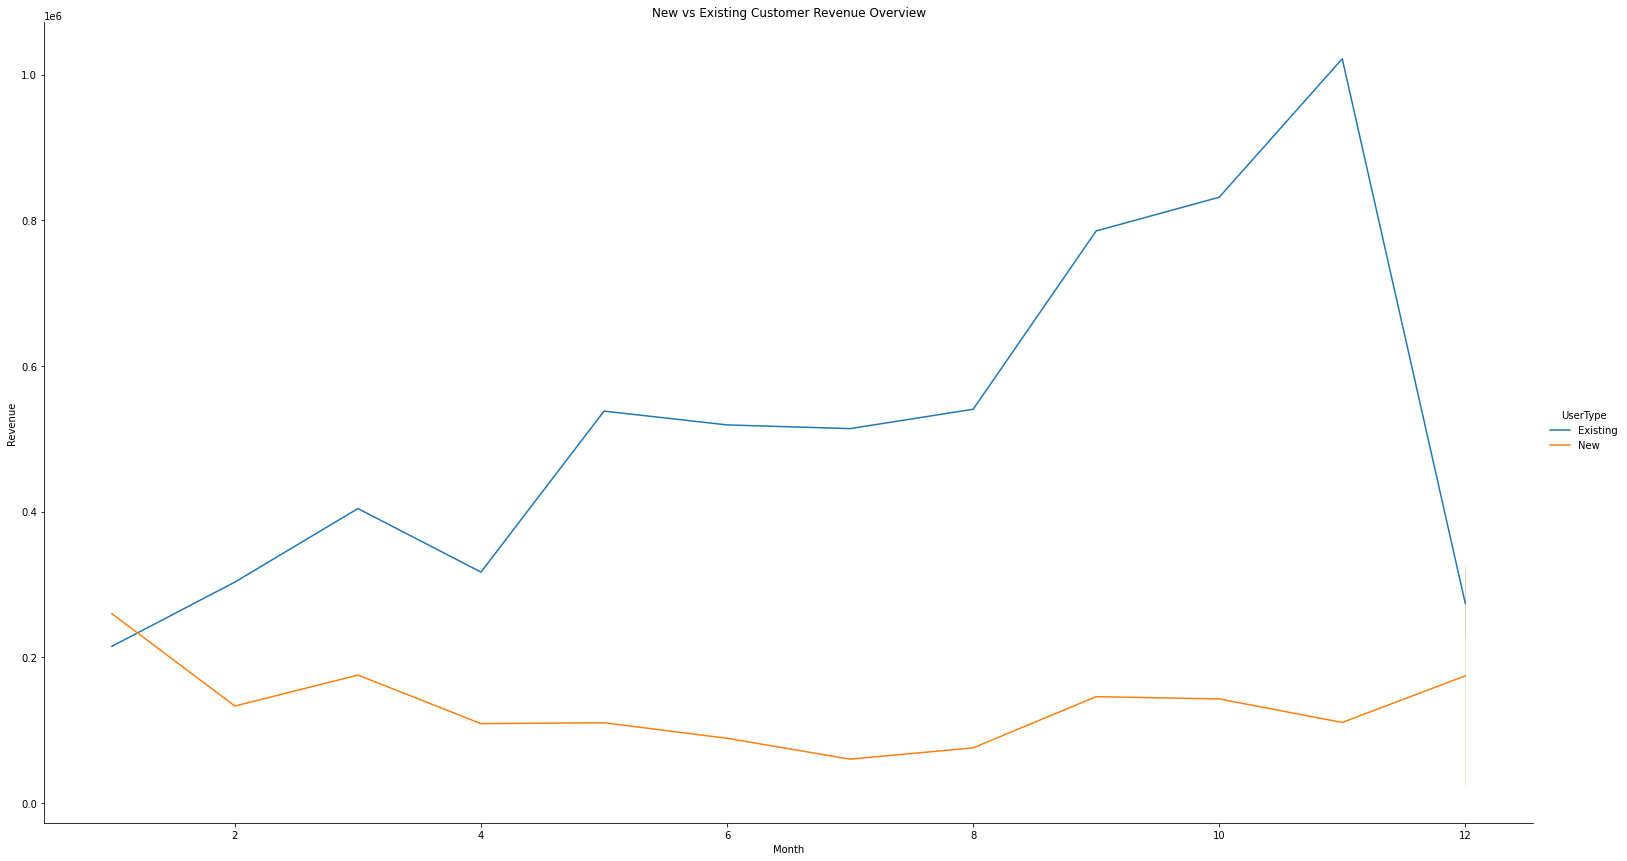

In [26]:
# New vs Existing User Revenue Analysis
df_new_revenue=df.groupby(["InvoiceMonth", "InvoiceYear", "UserType"])["Revenue"].sum().reset_index()
plt.figure()
sns.relplot(x="InvoiceMonth", y="Revenue", hue="UserType", data=df_new_revenue, kind="line", height=12, aspect=18/10)
plt.title("New vs Existing Customer Revenue Overview")
plt.xlabel("Month")
plt.ylabel("Revenue")